# Cost Cutting In Human Resource Management Through Employee Churn Prediction

> An approach to mitigate employee churn using [IBM HR Anlaytics Employee Attrition & Performance dataset](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset)

- toc: true
- badges: true
- comments: true
- categories: [hr-analytics, churn analysis, classification, recall, ibm-dataset, kaggle]
- image: images/Employee-Attrition.png

## Why Attrition is a Problem?

Companies invest quantifiably large sums of money and effort in hiring and this includes releasing and posting openings, paying recruiters, screening and interviewing candidates. Firms start earning their return on investment when a new hire starts to deliver functional and business requirements which take at least a couple of months.

Attrition refers to the number of people who stop working due to resignation, retirement, or death. Attrition can take various forms but generally for most companies, two types are most common namely
employee departure and employee retirement. Employees nowadays are more eager than ever before to jump from one business to another in search of better opportunities. Employee churn has become a major issue in most businesses since there has been a significant increase in staff turnover. 

## Import Libraries and modules

In [2]:
#collapse
import math
import time
import copy
import warnings
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff


from plotnine import *
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_error, accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder, scale
from sklearn_pandas import DataFrameMapper, gen_features, cross_validation
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from IPython.core.display import display, HTML

# settings:
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.options.display.max_columns = 100 
pd.options.display.max_rows = 1000 
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus']=False
plt.style.use('ggplot')
psd = lambda q: sqldf(q, gloabls())
py.init_notebook_mode(connected=True)
warnings.filterwarnings('ignore')

/var/folders/_0/n4532gdd0lzfngk_qy30wzc00000gq/T/ipykernel_50640/4217177242.py:30: DeprecationWarning:

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display



## Data Overview through Exploratory Data Analysis (EDA)

#### Displaying a couple of records to ghet a fair idea of how the dataset looks. It is most important to understand the numeric and categorical columns in any dataset. Let's also check for missing values for all columns/features. In case there are a lot of missing values we might need to employ missing values treatment as a part of data preprocessing. Information shows that this dataset does not contain any Null values.

In [5]:
#collapse
data = pd.read_csv('../data/employee_attrition_ibm_data.csv', index_col='EmployeeNumber')
print(f"This data has {data.shape[0]} employees with {data.shape[1]} features for each employee as follows")
display(data.head(5))

This data has 1470 employees with 34 features for each employee as follows


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


#### A general statistical descrition of data in all features can help us understand the distribution for each numeric feature.

In [6]:
#collapse
data.describe(include='all')   

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


#### Target variable : Attrition Label Count

No     1233
Yes     237
Name: Attrition, dtype: int64


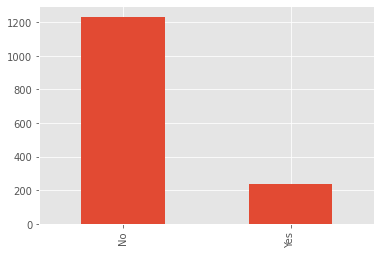

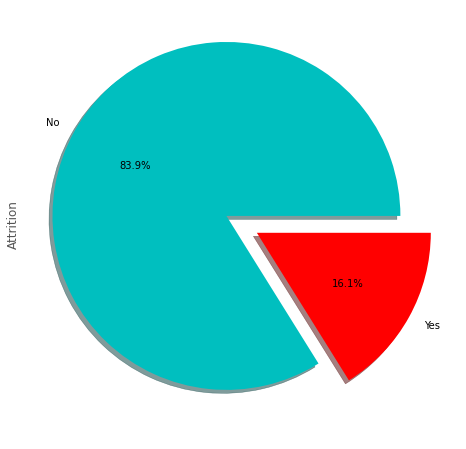

In [5]:
#collapse
data.Attrition.value_counts().plot(kind='bar')
plt.figure(figsize=(20,8))
data['Attrition'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=['c','r'])
print(data['Attrition'].value_counts())

### Summary:

*   Dataset Structure: 1470 observations (rows), 35 features (variables)
*   Missing Data: no missing data! this will make it easier to work with the dataset.
*   Data Type: We only have two datatypes in this dataset: categorical and integers
*   Label" Attrition is the label in our dataset and we would like to find out why employees are leaving the organization!
*   Imbalanced dataset: 1237 (84% of cases) employees did not leave the organization while 237 (16% of cases) left the organization making our dataset to be considered imbalanced since more people stay in the organization than they actually leave.

# Exploratory Data Analysis
#### Correlation between Attrtion and Features

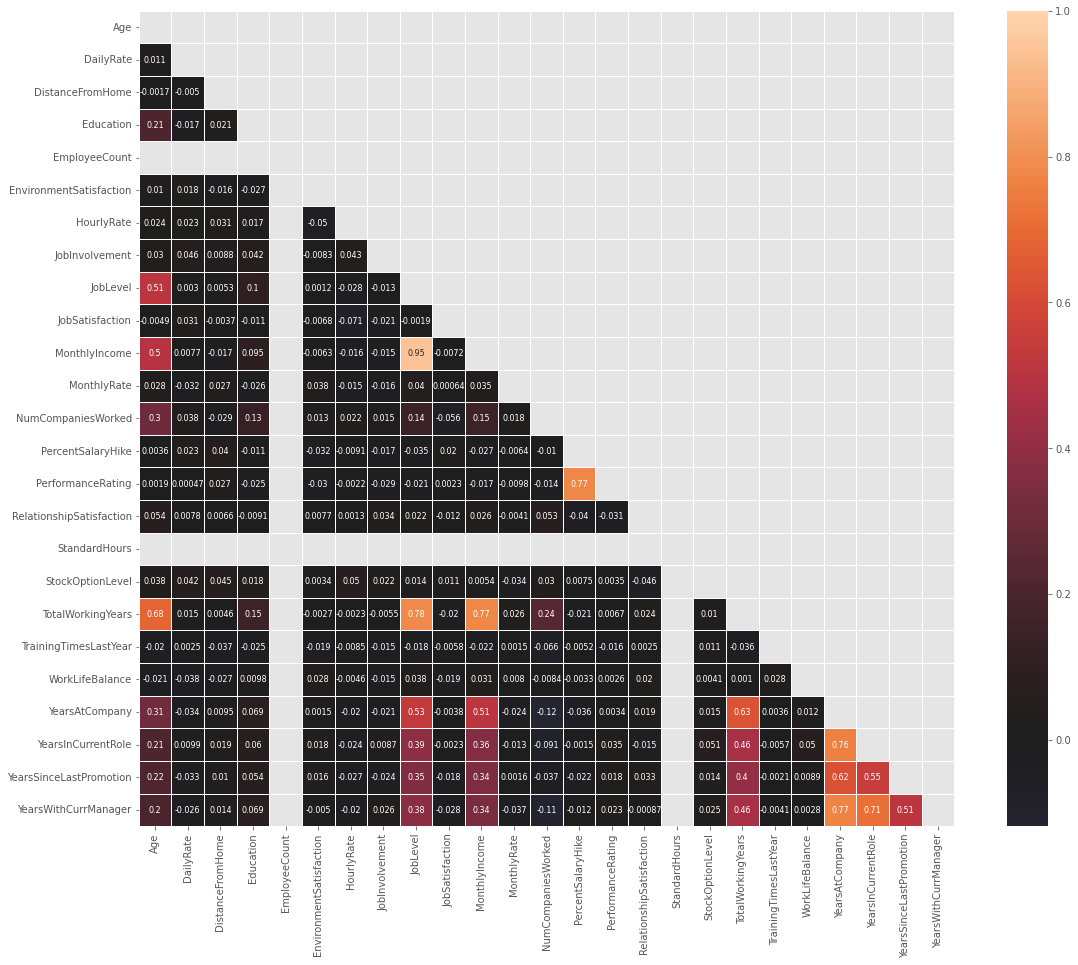

In [6]:
#collapse
# Subset the dataset into all the numerical values
numeric_hr = data.select_dtypes(include=[np.number])

# Compete the correlation matrix
corr = numeric_hr._get_numeric_data().corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(19, 15))

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(corr, mask=mask, center=0.0,  annot=True, annot_kws={"size": 8}, # cmap=cmap, 
                      vmax = 1, square=True, linewidths=.5, ax=ax)
plt.show()

**Interpretations:**
- Age: -0.15 ~ With increase in age less likely to attrition ~ which is reasonable
- DailyRate: -0.0056 ~ With increase in DailyRate attrition decreases ~ which is reasonable
- DistanceFromHome: 0.077 ~ With increase in DistanceFromHome attrition is more likely ~ which is reasonable
- Education: -0.031 ~ With higher level of education, attrition becomes less likely ~ which is reasonable
- EnvironmentSatisfaction: -0.103 ~ With higher level of EnvironmentSatisfaction, attrition becomes less likely ~ which is reasonable
- NumCompaniesWorked : 0.043494 ~ With increase in NumCompaniesWorked, more likely to attrition --> reflects tendency to switch more jobs

In [7]:
#collapse
'''Setting default layouts for all plots'''
# setting a default figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

# setting a default style
sns.set_style('darkgrid')

# setting tight layout
plt.figure(tight_layout=True)

# setting a default font sixe for labels
sns.set_context("paper", font_scale=1)

<Figure size 720x432 with 0 Axes>

### **Income vs Attrition:**

#### Average Income by Departments
**Q.** What is the average monthly income by department? Are there any significant differences between individuals who quit and didn't quit?

- **People with lower salaries had more attrition rate than the one’s being paid well**  

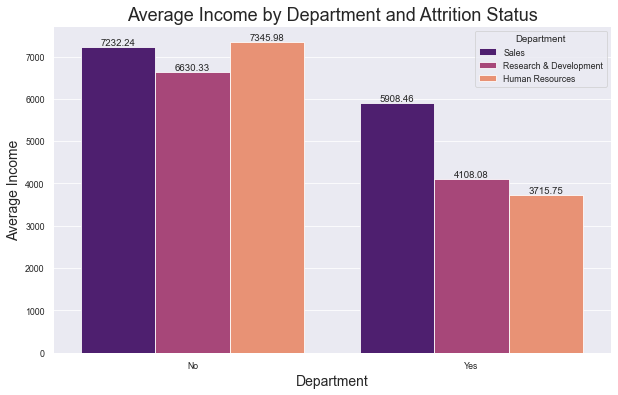

In [8]:
#collapse
# Plot Option 1
plt.title('Average Income by Department and Attrition Status', size=18)
plots = sns.barplot(x="Attrition", y="MonthlyIncome", hue="Department", order = ['No','Yes'],data = data, palette = 'magma', ci=None)
for container in plots.containers:
    plt.bar_label(container)
plt.xlabel("Department", size=14)
plt.ylabel("Average Income", size=14)
plt.show()

#### Determining Job Satisfaction by Income
**Q** Are there significant changes in the level of income by Job Satisfaction? Are individuals with a lower satisfaction getting much less income than the ones who are more satisfied?

- **It seems the lower the job satisfaction the wider the gap by attrition status in the levels of income.**

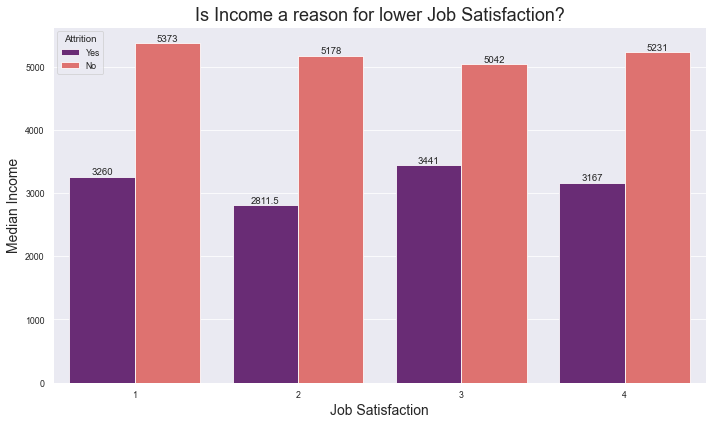

In [9]:
#collapse
# Plot Option 1: Q2: Is Income a reason for lower Job Satisfaction?
sns.set_style('darkgrid')
plt.figure(figsize = (10, 6), tight_layout=True)
plt.title('Is Income a reason for lower Job Satisfaction?', size=18)
plots = sns.barplot(y="MonthlyIncome", x="JobSatisfaction", hue="Attrition", data=data, palette = 'magma',  estimator=np.median, ci=None)
for container in plots.containers:
    plt.bar_label(container)
plt.xlabel("Job Satisfaction", size=14)
plt.ylabel("Median Income", size=14)
plt.show()

#### YearsInCurrentRole vs Attrition

**Q. What is the trend of Attrition with respect to the number of years spent in a current role? How is Monthly income distributed among these years?**
- The count plot very well reflects the typical tendency of newly recruited professionals, with under 4 years in current roles, to switch jobs frequently if the role is unsatisfactory or for monetary growth until they find stability. 
- Note that there is a hike in attrition among employees with 7,8,9 years of experience which amounts to approximately 21.5% of the total attrition rate in the organisation. 
- The box plot very interestingly highlights that employees with 6 years into their current role are earning more than 13, 14 years into the current role. 
- From these two plots together, we can infer that attrition seems to increase gradually when the monthly income decreases beyond 6 years. T

<AxesSubplot:title={'center':'YearsInCurrentRole Vs MonthlyIncome'}, xlabel='YearsInCurrentRole', ylabel='MonthlyIncome'>

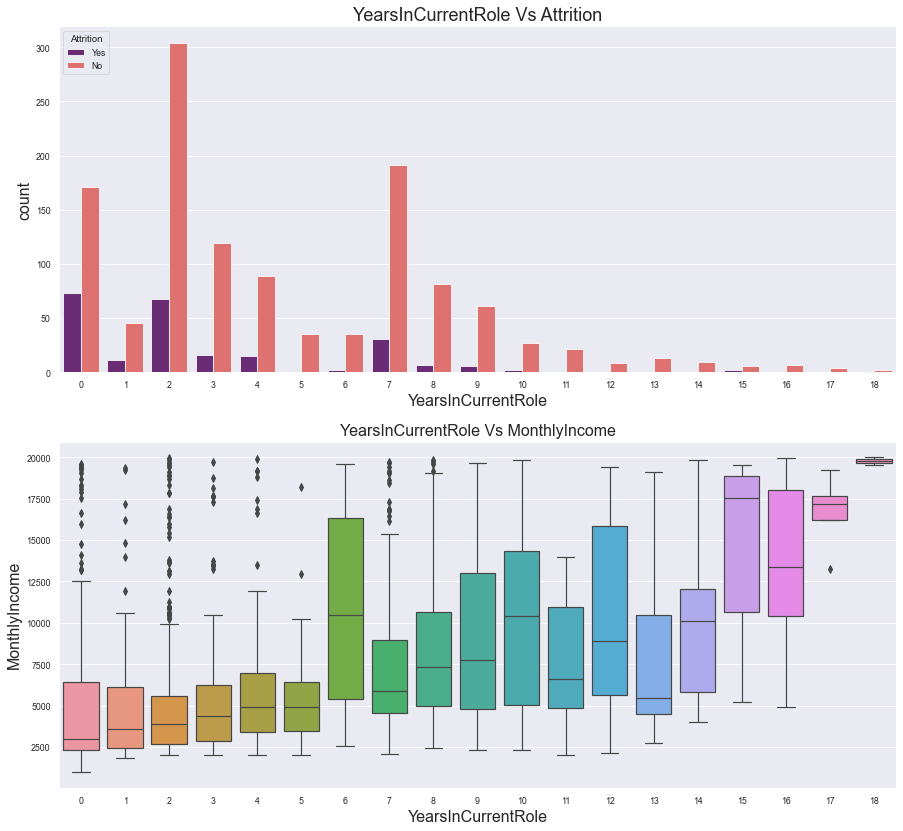

In [10]:
#collapse
# sns.set_context("paper", font_scale=0.9) 
sns.set_context("paper", rc={"font.size":18,"axes.titlesize":16,"axes.labelsize":16})
plt.figure(figsize=(15,14))
plt.subplot(211)
plt.title('YearsInCurrentRole Vs Attrition',fontsize = 18)
sns.countplot(data['YearsInCurrentRole'],hue=data['Attrition'],palette='magma')

plt.subplot(212)
plt.title('YearsInCurrentRole Vs MonthlyIncome')
sns.boxplot(data['YearsInCurrentRole'],data['MonthlyIncome'])

# plt.savefig('YearsIncurrentrole.png',dpi=300)

###  Satisfaction Levels vs Attrition
#### EnvironmentSatisfaction by Job Roles vs Attrition

**Q.** Which Job Roles has lowest olevels of Environment Satisfaction? Was low environment satisfaction a significant reason for attrition?** 

- **EnvironmentSatisfaction by Job Roles:**  Managers and healthcare representatives operate in a less stressful atmosphere than sales representatives, which may be due to the fact that most sales representatives work outside the firm.

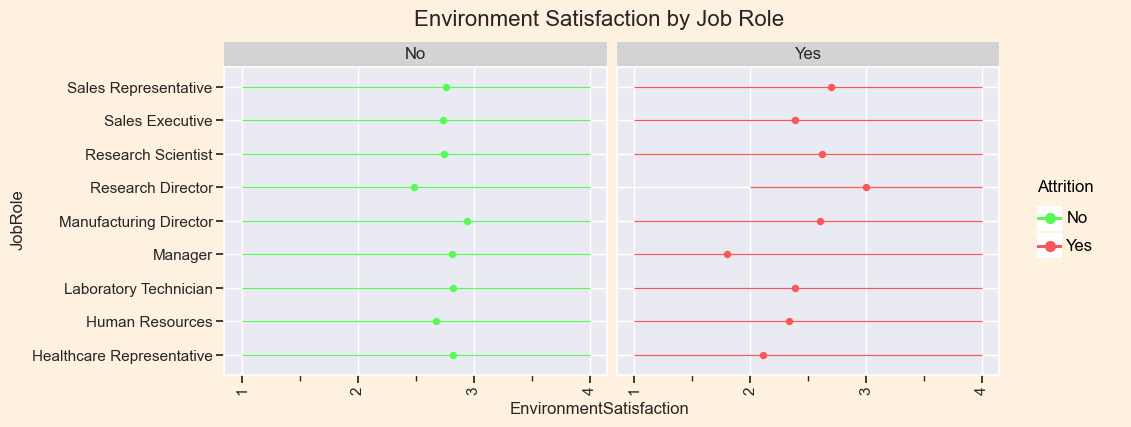

<ggplot: (-9223371905573307784)>

In [11]:
#collapse
daily_r = data[['JobRole', 'Attrition', 'EnvironmentSatisfaction']]
gp = ggplot(daily_r, aes(
    x='JobRole', y='EnvironmentSatisfaction', color='Attrition')) + facet_wrap(['Attrition']) + coord_flip() + theme_seaborn() + theme(
        axis_text_x = element_text(angle=90), plot_title=element_text(hjust=0.5, size=16), plot_background=element_rect(fill='#FFF1E0'), figure_size=(10, 4)) + stat_summary(
            fun_y = np.mean, fun_ymin=np.min, fun_ymax=np.max) + scale_color_manual(values=["#58FA58", "#FA5858"]) + labs(title="Environment Satisfaction by Job Role")
gp

#### Relationship Satisfaction by Gender vs Attrition
**Q.** Does relationship satisfaction affect males and females differently with regards to job attrition?

- **Relationship Satisfaction by Gender:** People who did not undergo attrition seemed to enjoy higher levels of relationship satisfaction. Among those who underwent attrition, females tended to have lower levels of relationship satisfaction.

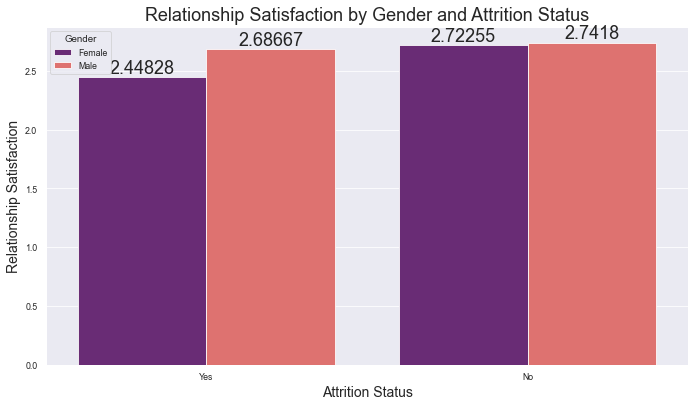

In [12]:
#collapse
plt.figure(figsize = (10, 6), tight_layout=True)
plt.title('Relationship Satisfaction by Gender and Attrition Status', size=18)
plots = sns.barplot(x="Attrition", y="RelationshipSatisfaction", hue="Gender", order = ['Yes','No'], data=data, palette = 'magma', ci=None)
for container in plots.containers:
    plt.bar_label(container)
plt.xlabel("Attrition Status", size=14)
plt.ylabel("Relationship Satisfaction", size=14)
plt.show()

#### YearsWithCurrManager with JobSatisfaction vs Attrition
**Q.** Were employees more likely to leave their jobs if they spent more time with the same manager?
- Employees who undergo attrititon don't spend more than 2 years with the same manager, irregardless of job satisfaction

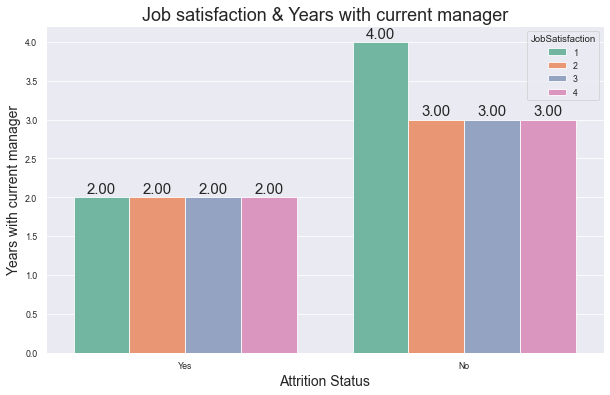

In [13]:
#collapse
# ManagerExperience + JobSatisfaction
plt.title('Job satisfaction & Years with current manager', size=18)
plots = sns.barplot(x="Attrition", y="YearsWithCurrManager", hue="JobSatisfaction", data=data, estimator=np.median, palette = 'Set2', ci=None) 
# for container in plots.containers:
#   plt.bar_label(container)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel("Attrition Status", size=14)
plt.ylabel("Years with current manager", size=14)
plt.show()

### OverTime vs Attrition

**Q. How does exhaustion contribute to attrition?**
- Generally, those who stayed further from home were more likely to undergo attrition. The rate of attrition is especially high among those who worked from home and also worked overtime. This group most likely resigned due to the severe lack of personal time since most of their time is spent working or travelling to work and are probably very exhausted.

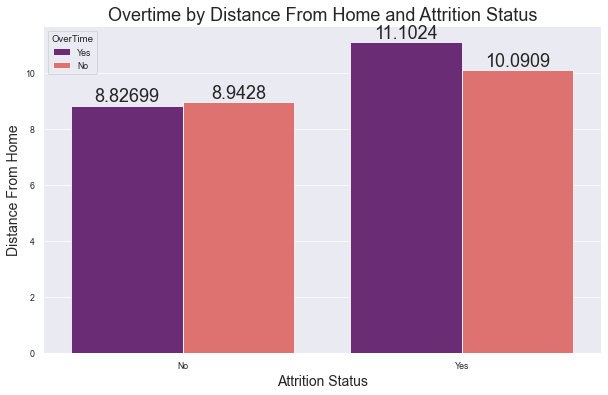

In [14]:
#collapse
plt.title('Overtime by Distance From Home and Attrition Status', size=18)
plots = sns.barplot(x="Attrition", y="DistanceFromHome", hue="OverTime", order = ['No','Yes'],data=data, palette = 'magma', ci=None)
for container in plots.containers:
    plt.bar_label(container)
plt.xlabel("Attrition Status", size=14)
plt.ylabel("Distance From Home", size=14)
plt.show()

# Feature Selection and Engineering

### Analysing for different groups of age

<AxesSubplot:title={'center':'Age Wise Binning wrt Attrition'}, xlabel='Age', ylabel='count'>

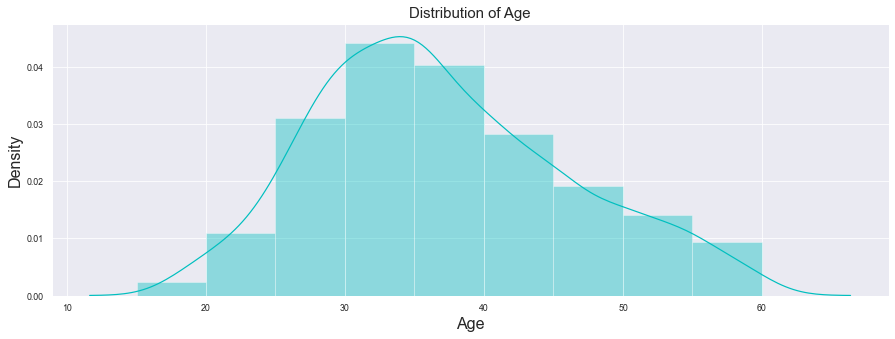

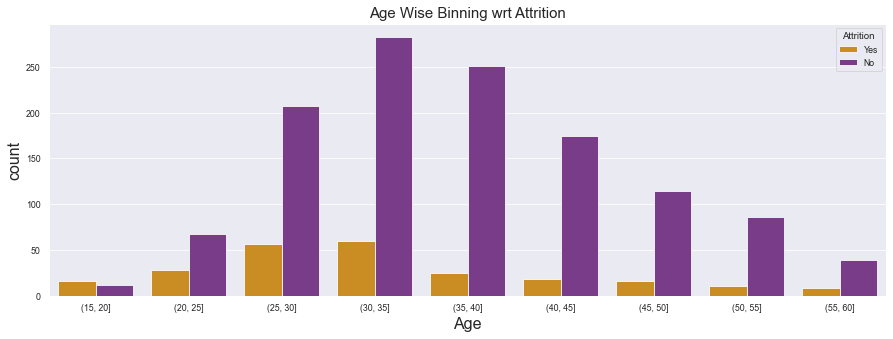

In [15]:
#collapse
agebins=pd.cut(data['Age'],bins=[15,20,25,30,35,40,45,50,55,60]) #Discretisation to understand what age categories to Target
plt.figure(figsize=(15,5))
plt.title('Distribution of Age',size=15)
sns.distplot(data['Age'],bins=[15,20,25,30,35,40,45,50,55,60],color='c')

plt.figure(figsize=(15,5))
plt.title('Age Wise Binning wrt Attrition',size=15)
sns.countplot(agebins, hue='Attrition',data=data,palette='CMRmap_r')

### Data Processing and Feature Engineering

In [16]:
#collapse
# Reassign target
data.Attrition.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)

# Find & Delete the useless features
li_useless_feat = []
for col in list(data.columns):
    if data[col].nunique() == 1:
        li_useless_feat.append(col)
print('Useless Features:{}'.format(li_useless_feat))
data.drop(columns=li_useless_feat, inplace=True)

# generation-related functions
def age_to_born_yyyy(x):
    return 2015 - x

def cat_generation(x):
    if (x>=1940) & (x<=1959):
        return 'gen_baby_boomer'
    elif (x>=1960) & (x<=1979):
        return 'gen_x'
    elif (x>=1980) & (x<=1994):
        return 'gen_y'
    elif (x>=1995) & (x<=2010):
        return 'gen_z'
    else:
        return 'gen_alpha'        

# Add generation-related columns
data['born_yyyy'] = data.Age.apply(age_to_born_yyyy)
data['generation'] = data.born_yyyy.apply(cat_generation)

display(
    np.round(data.generation.value_counts()/len(data)*100, 2),
    data.shape,
    data.head()
)

Useless Features:['EmployeeCount', 'Over18', 'StandardHours']


gen_y              47.69
gen_x              47.21
gen_baby_boomer     3.20
gen_z               1.90
Name: generation, dtype: float64

(1470, 33)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,born_yyyy,generation
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,1974,gen_x
2,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1966,gen_x
4,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,1978,gen_x
5,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,1982,gen_y
7,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,1988,gen_y


### Check for Skewness

Skewness for Hourly Rate is : 0.018577807891132458
Kurtosis for Hourly Rate is : -1.2149560995878737


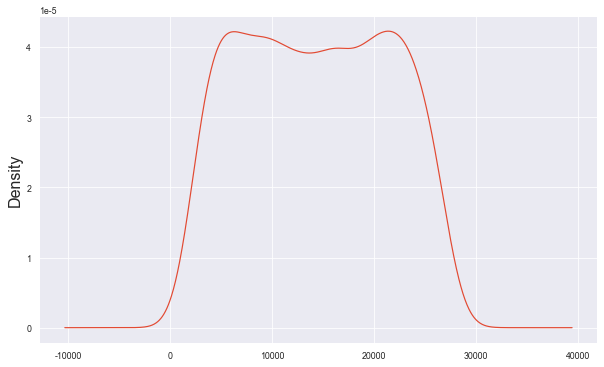

In [17]:
#collapse
data['MonthlyRate'].plot(kind='kde') 
print('Skewness for Hourly Rate is :' ,data['MonthlyRate'].skew())
print('Kurtosis for Hourly Rate is :' ,data['MonthlyRate'].kurt())

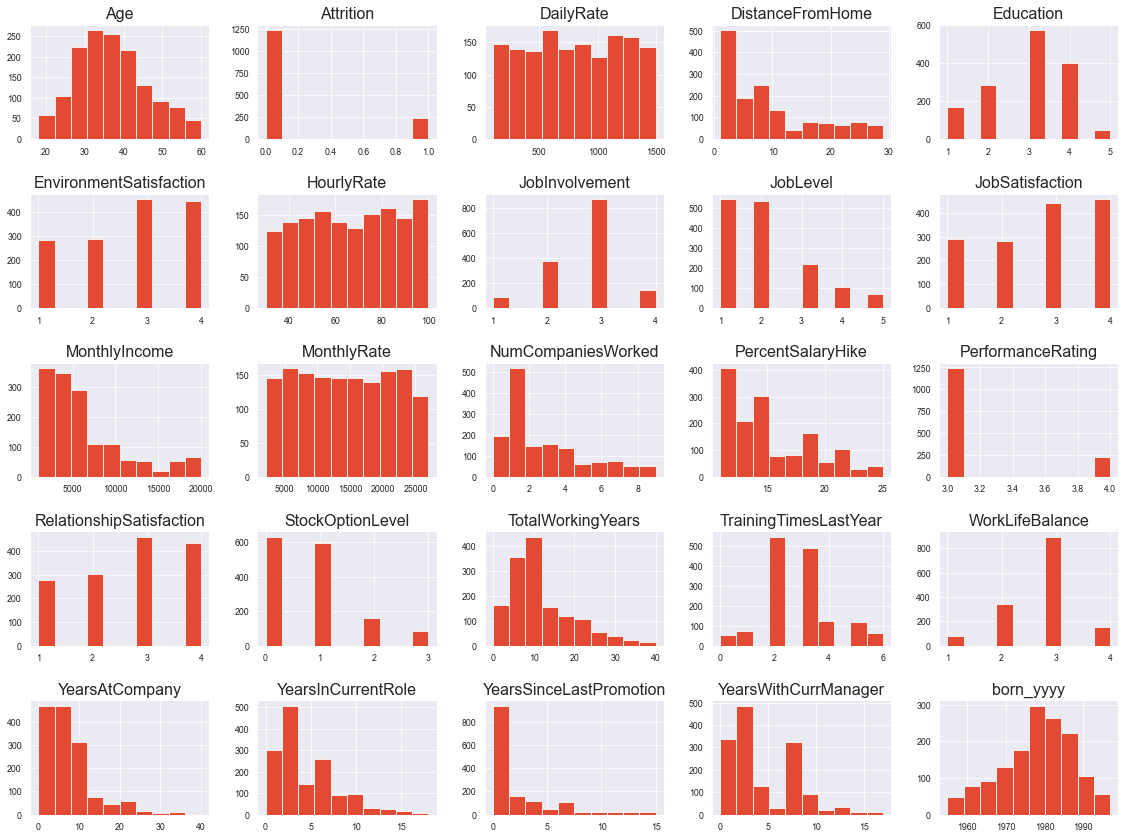

In [18]:
#collapse
data.hist(figsize=(16,12))
plt.tight_layout()

### Log-Transformed skewed features

In [19]:
#collapse
log_transform = ['DailyRate', 'Age', 'HourlyRate', 'MonthlyIncome', 'PercentSalaryHike', 'DistanceFromHome', 'MonthlyRate','born_yyyy']
data[log_transform] = np.log(data[log_transform])
data.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,born_yyyy,generation
count,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470
unique,NaN,NaN,3,NaN,3,NaN,NaN,6,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gen_y
freq,NaN,NaN,1043,NaN,961,NaN,NaN,606,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,701
mean,3.578034,0.161224,NaN,6.511255,NaN,1.743130,2.912925,NaN,2.721769,NaN,4.135241,2.729932,2.063946,NaN,2.728571,NaN,8.552515,9.402331,2.693197,NaN,2.695025,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,7.589869,NaN
std,0.250205,0.367863,NaN,0.660616,NaN,1.060198,1.024165,NaN,1.093082,NaN,0.334764,0.711561,1.106940,NaN,1.102846,NaN,0.664450,0.633477,2.498009,NaN,0.228224,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.004623,NaN
min,2.890372,0.000000,NaN,4.624973,NaN,0.000000,1.000000,NaN,1.000000,NaN,3.401197,1.000000,1.000000,NaN,1.000000,NaN,6.916715,7.646831,0.000000,NaN,2.397895,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.578145,NaN
25%,3.401197,0.000000,NaN,6.142037,NaN,0.693147,2.000000,NaN,2.000000,NaN,3.871201,2.000000,1.000000,NaN,2.000000,NaN,7.976252,8.993055,1.000000,NaN,2.484907,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,7.586804,NaN
50%,3.583519,0.000000,NaN,6.687109,NaN,1.945910,3.000000,NaN,3.000000,NaN,4.189655,3.000000,2.000000,NaN,3.000000,NaN,8.500858,9.563494,2.000000,NaN,2.639057,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,7.590347,NaN
75%,3.761200,0.000000,NaN,7.053586,NaN,2.639057,4.000000,NaN,4.000000,NaN,4.427823,3.000000,3.000000,NaN,4.000000,NaN,9.033484,9.926300,4.000000,NaN,2.890372,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,7.593374,NaN


### Encoding Categorical Variables as per ordinal and nomial meaning
#### List all categorical features

In [20]:
#collapse
data.select_dtypes(include='object').columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime', 'generation'],
      dtype='object')

**Encode the ordinal_categorical features - Only OverTime in this dataset**

In [21]:
#collapse
ordinal_categorical = ['OverTime']
feature_map = gen_features(columns= ordinal_categorical, classes=[LabelEncoder])
mapping = DataFrameMapper(feature_map)
data[ordinal_categorical] = mapping.fit_transform(data)
print(data.shape)
data.head(3)

(1470, 33)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,born_yyyy,generation
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3.713572,1,Travel_Rarely,7.004882,Sales,0.000000,2,Life Sciences,2,Female,4.543295,3,2,Sales Executive,4,Single,8.698347,9.877092,8,1,2.397895,3,1,0,8,0,1,6,4,0,5,7.587817,gen_x
2,3.891820,0,Travel_Frequently,5.631212,Research & Development,2.079442,1,Life Sciences,3,Male,4.110874,2,2,Research Scientist,2,Married,8.542861,10.122904,1,0,3.135494,4,4,1,10,3,3,10,7,1,7,7.583756,gen_x
4,3.610918,1,Travel_Rarely,7.224753,Research & Development,0.693147,2,Other,4,Male,4.521789,2,1,Laboratory Technician,3,Single,7.644919,7.781556,6,1,2.708050,3,2,0,7,3,3,0,0,0,0,7.589842,gen_x


**Encode the nominal_categorical features**

In [22]:
#collapse
nominal_categorical = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'generation']
d_dummies = data.copy()
for col in nominal_categorical:
    freqs = d_dummies[col].value_counts()
    k = freqs.index[freqs>5][:-1]                 # does the work of One Hot Encoding
    for cat in k:
        name = col+'_'+cat
        d_dummies[name] = (d_dummies[col] == cat).astype(int)
    del d_dummies[col]
    print(col)
print(d_dummies.shape)
d_dummies.head(2)

BusinessTravel
Department
EducationField
Gender
JobRole
MaritalStatus
generation
(1470, 49)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,born_yyyy,BusinessTravel_Travel_Rarely,BusinessTravel_Travel_Frequently,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Medical,EducationField_Marketing,EducationField_Technical Degree,EducationField_Other,Gender_Male,JobRole_Sales Executive,JobRole_Research Scientist,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Healthcare Representative,JobRole_Manager,JobRole_Sales Representative,JobRole_Research Director,MaritalStatus_Married,MaritalStatus_Single,generation_gen_y,generation_gen_x,generation_gen_baby_boomer
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3.713572,1,7.004882,0.000000,2,2,4.543295,3,2,4,8.698347,9.877092,8,1,2.397895,3,1,0,8,0,1,6,4,0,5,7.587817,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
2,3.891820,0,5.631212,2.079442,1,3,4.110874,2,2,2,8.542861,10.122904,1,0,3.135494,4,4,1,10,3,3,10,7,1,7,7.583756,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0


# Classification Models

## Model Setup and Evaluation Criteria

Predicting employee attrition is a classic supervised learning problem. For classification
modelling and performance evaluation the dataset is split into a 70:30 ratio for training and
testing respectively. Dependent variable is Attrition with positive class label as ‘Yes’
indicating employee underwent attrition. We aim to focus on accurately predicting
employees that are more likely to churn and avoid missing out on predicting employees
‘at-risk’ of attrition - even if it means over-predicting them. We propose 4 classifiers and
discussed in Section 3.2 and analysed results in Section 4.
Recall and F1 Score will be used for evaluating model performance for employee attrition
problem. These metrics are chosen because Recall interprets ‘What percentage of the
employees being attrited does the classifier successfully report?’ Maximizing Recall would
imply minimizing under-shooting or False Negatives
In our case, Precision interprets ‘Employees that are predicted to leave by classifier, how
many employees truly underwent attrition?’ Maximizing Precision would imply Minimize
over-shooting that is to take action for employees ‘at-risk’ of attrition. However, since we
don’t want to compromise precision too much, we will also take into account F1 Score which
is the harmonic mean between precision and recall to strike a balance between the two.

## Logistic Regression, Decision Trees and Random Forest

In [23]:
#collapse
classifiers = {'LR': LogisticRegression(),
               'DT': DecisionTreeClassifier(class_weight='balanced'),
               'RFC': RandomForestClassifier(class_weight='balanced')}
color = {'LR': 'orange', 'DT': 'green','RFC': 'blue', 'rfc_hp_tuned':'yellow', 'rfc_hp_tuned_balanced':'brown'}

def model_eval(algo, algo_name, X_train , y_train , X_test , y_test):

    algo.fit(X_train , y_train)
    y_pred = algo.predict(X_train)

    y_train_pred = algo.predict(X_train)               # Finding the positives and negatives 
    y_train_prob = algo.predict_proba(X_train)[:,1]    #we are intersted only in the second column

    y_test_pred = algo.predict(X_test)
    y_test_prob = algo.predict_proba(X_test)[:,1]
    
    conf_m = confusion_matrix(y_test , y_test_pred, labels=[0,1])
    FNR = conf_m[1][0] * 100 / (conf_m[1][0] + conf_m[1][1]) 
    
    cv_accuracy=np.mean(cross_val_score(algo, X_test, y_test,cv=5,scoring='accuracy')*100)
    cv_roc_auc=cross_val_score(algo, X_test, y_test,cv=5,scoring='roc_auc')*100
    
    #overall acc of train model
    print('*'*50)
    print(algo_name)
    print("Training Metrics")
    print('Confusion matrix - Train :', '\n',confusion_matrix(y_train , y_train_pred, labels=[0,1]))
    print('Overall Accuracy - Train :',accuracy_score(y_train , y_train_pred))
    print('AUC - Train:', roc_auc_score(y_train , y_train_prob))
    
    print('*'*50)
    print("Testing Metrics")
    print('Confusion matrix - Test :', '\n', conf_m)
    print('Overall Accuracy - Test :',accuracy_score(y_test , y_test_pred))
    print('AUC - Test:', roc_auc_score(y_test , y_test_prob))

    print('*'*50)
    print('\n5-fold Cross Validation Scores')
    print(f'cv_accuracy: {cv_accuracy}\ncv_roc_auc: {np.mean(cv_roc_auc)}\n')
    
    print('Classification Report:\n', classification_report(y_test, y_test_pred))

    fpr , tpr , threshold = roc_curve(y_test , y_test_prob)
    plt.plot(fpr , fpr, 'r-')
    plt.plot(fpr , tpr , color=color[algo_name], label=algo_name)
    plt.title("Receiver Operating Characteristics(ROC) Curve")
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.legend(loc='best')
    
    return y_test_pred, y_test_prob

In [24]:
#collapse
corr_dummies = d_dummies.corr()
high_corr_cols = corr_dummies[abs(corr_dummies['Attrition']) >= 0.1].index
corr_dummies.loc[high_corr_cols].sort_values(by='Attrition').style.background_gradient(cmap='coolwarm')

y = d_dummies['Attrition']
X = d_dummies[high_corr_cols].drop(['Attrition','Age','TotalWorkingYears'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print(X.shape, y.shape)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1470, 16) (1470,)
(1029, 16) (441, 16) (1029,) (441,)


## Classification Model Evaluation

Scores for basic models:

**************************************************
LR
Training Metrics
Confusion matrix - Train : 
 [[849  14]
 [119  47]]
Overall Accuracy - Train : 0.8707482993197279
AUC - Train: 0.8168339638973043
**************************************************
Testing Metrics
Confusion matrix - Test : 
 [[358  12]
 [ 41  30]]
Overall Accuracy - Test : 0.8798185941043084
AUC - Test: 0.826570232204035
**************************************************

5-fold Cross Validation Scores
cv_accuracy: 87.30081716036773
cv_roc_auc: 81.33462033462033

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       370
           1       0.71      0.42      0.53        71

    accuracy                           0.88       441
   macro avg       0.81      0.70      0.73       441
weighted avg       0.87      0.88      0.87       441

**************************************************
DT
Training Metrics
Confusion mat

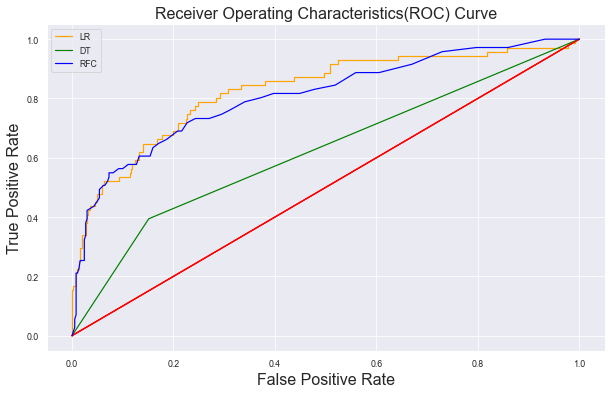

In [25]:
#collapse
print('Scores for basic models:\n')
for key in classifiers:
    y_test_pred, y_test_prob = model_eval(classifiers[key], key, X_train, y_train, X_test, y_test)

# Data Augmentation
### SMOTE: Synthetic Minority Oversampling Technique
- SMOTE should be applied on the training set. Then, the model should be "evaluated on the stratified but non-transformed test set"

Scores for basic models, trained on augmented balanced data:

(1470, 16) (1470,)
(1726, 16) (441, 16) (1726,) (441,)
(array([0, 1], dtype=int64), array([863, 863], dtype=int64))
**************************************************
LR
Training Metrics
Confusion matrix - Train : 
 [[721 142]
 [137 726]]
Overall Accuracy - Train : 0.8383545770567786
AUC - Train: 0.9083595047591939
**************************************************
Testing Metrics
Confusion matrix - Test : 
 [[294  76]
 [ 27  44]]
Overall Accuracy - Test : 0.7664399092970522
AUC - Test: 0.7647887323943662
**************************************************

5-fold Cross Validation Scores
cv_accuracy: 87.30081716036773
cv_roc_auc: 81.33462033462033

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85       370
           1       0.37      0.62      0.46        71

    accuracy                           0.77       441
   macro avg       0.64      0.71      0

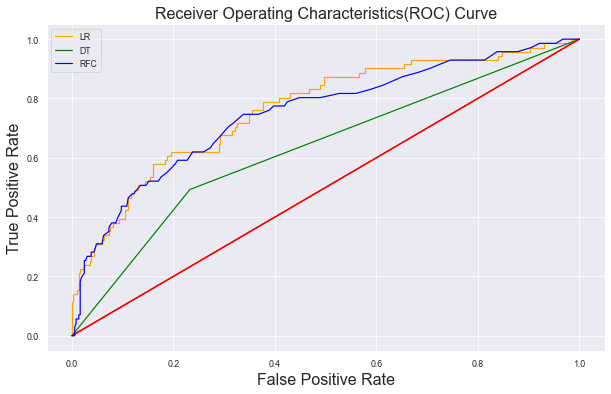

In [26]:
#collapse
y_aug = copy.deepcopy(y.values)
x_aug = copy.deepcopy(X.values)

def aug_pipeline(clf, clf_name, X_train, y_train, X_test, y_test):
    smt = SMOTE(random_state=0)
    X_train_aug, y_train_aug = smt.fit_resample(X_train, y_train)
    
    print(X.shape, y.shape)
    print(X_train_aug.shape, X_test.shape, y_train_aug.shape, y_test.shape)
    print(np.unique(y_train_aug, return_counts=True))
    
    return model_eval(clf, clf_name, X_train_aug, y_train_aug, X_test, y_test)

print('Scores for basic models, trained on augmented balanced data:\n')

for key in classifiers:
    aug_pipeline(classifiers[key], key, X_train, y_train, X_test, y_test)

# Logistic Regression Model Equations and Feature importance

**************************************************
LR
Training Metrics
Confusion matrix - Train : 
 [[849  14]
 [119  47]]
Overall Accuracy - Train : 0.8707482993197279
AUC - Train: 0.8168339638973043
**************************************************
Testing Metrics
Confusion matrix - Test : 
 [[358  12]
 [ 41  30]]
Overall Accuracy - Test : 0.8798185941043084
AUC - Test: 0.826570232204035
**************************************************

5-fold Cross Validation Scores
cv_accuracy: 87.30081716036773
cv_roc_auc: 81.33462033462033

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       370
           1       0.71      0.42      0.53        71

    accuracy                           0.88       441
   macro avg       0.81      0.70      0.73       441
weighted avg       0.87      0.88      0.87       441



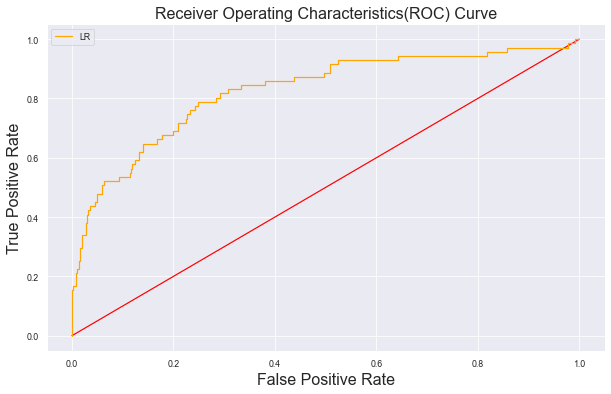

In [27]:
#collapse
# form F(x) equation for printing in report
lr = LogisticRegression(fit_intercept=True)
y_test_pred, y_test_prob = model_eval(lr, 'LR', X_train , y_train , X_test , y_test)
lr_eqn = f"{round(lr.intercept_[0], 4)} + "
for i in range(len(X_train.columns)):
    lr_eqn = lr_eqn + f"({round(lr.coef_[0][i],3)}*{X_train.columns[i]}) + "

In [28]:
#collapse
print(lr_eqn)

0.1535 + (-0.403*EnvironmentSatisfaction) + (-0.531*JobInvolvement) + (-0.145*JobLevel) + (-0.415*JobSatisfaction) + (-0.535*MonthlyIncome) + (1.433*OverTime) + (-0.197*StockOptionLevel) + (0.083*YearsAtCompany) + (-0.111*YearsInCurrentRole) + (-0.104*YearsWithCurrManager) + (0.83*born_yyyy) + (0.821*BusinessTravel_Travel_Frequently) + (0.609*JobRole_Sales Representative) + (0.732*MaritalStatus_Single) + (-0.206*generation_gen_y) + (-0.637*generation_gen_x) + 


In [29]:
#collapse
f_x_test = lr.intercept_[0] + sum([lr.coef_[0][i]*X_test.iloc[:, i] for i in range(len(X_test.columns))])
prob = np.exp(f_x_test) / (1 + np.exp(f_x_test))

In [30]:
#collapse
results = pd.DataFrame({'Log_odds_f(x)': f_x_test.values,
                        'Probability_p+(x)':prob.values,
                        'Predicted Attrition y_pred': y_test_pred, 
                        'True Attrition y_test': y_test.values},
                       index = f_x_test.index)
results.sort_values(by='True Attrition y_test', ascending=False).head()

,Log_odds_f(x),Probability_p+(x),Predicted Attrition y_pred,True Attrition y_test
EmployeeNumber,,,,
816,0.990499,0.729186,1,1
648,1.057191,0.742153,1,1
1004,0.280909,0.569769,1,1
1458,1.645732,0.838313,1,1
137,0.775118,0.684627,1,1


Text(0, 0.5, 'Probability of Attrition p+(x)')

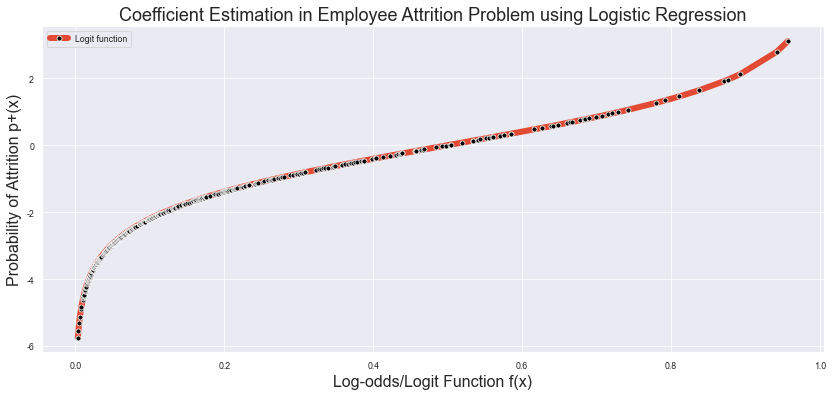

In [31]:
#collapse
plt.figure(figsize=(14,6))
plt.title('Coefficient Estimation in Employee Attrition Problem using Logistic Regression', fontsize=18)
p = sns.lineplot(data=results, x = 'Probability_p+(x)', y='Log_odds_f(x)',  marker='.', markerfacecolor='black', markersize='10', label='Logit function', linewidth=6)
p.set_xlabel('Log-odds/Logit Function f(x)', fontsize = 16)
p.set_ylabel('Probability of Attrition p+(x)', fontsize = 16)

### Feature Importance for Logistic Regression

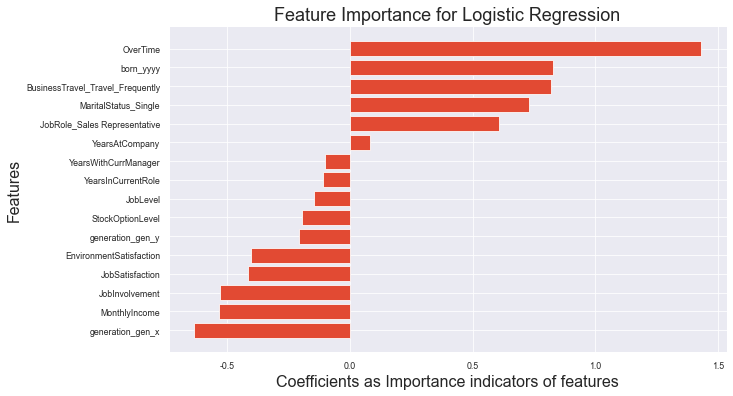

In [32]:
#collapse
# get importance: in linear models the importance is given by coefficients
importances = lr.coef_[0]
names = X_train.columns
importances, names = zip(*sorted(zip(importances, names)))

# Lets plot this
plt.figure(figsize=(10,6))
plt.barh(range(len(names)), importances, align = 'center')
plt.yticks(range(len(names)), names)
plt.xlabel('Coefficients as Importance indicators of features', fontsize = 16)
plt.ylabel('Features',fontsize = 16)
plt.title('Feature Importance for Logistic Regression',fontsize = 18)
plt.show()

### inference:
# We can observe that features that are inversely proportional to attrition such as high job satisfaction, Environment Satisfaction, 

# Random Forest HyperParameter-Tuning and Feature importance

In [33]:
#collapse
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rfc = RandomForestClassifier(random_state=3)
params = { 'n_estimators' : sp_randint(15 , 200) , 
           'max_depth' : sp_randint(2,15) , 
           'min_samples_split' : sp_randint(2,10) ,
           'min_samples_leaf' : sp_randint(1,10) ,
           'criterion' : ['gini' , 'entropy']
    
}

rsearch_rfc = RandomizedSearchCV(rfc , param_distributions= params , n_iter= 50 , cv = 5 , scoring='recall' , random_state= 3 , return_train_score=True , n_jobs=-1)

rsearch_rfc.fit(X,y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=3),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E915F64D08>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E914A7EF08>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E914A42748>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E915F60F08>},
                   random_state=3, return_train_score=True, scoring='recall')

In [34]:
#collapse
rsearch_rfc.best_params_   

{'criterion': 'gini',
 'max_depth': 12,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 91}

**************************************************
rfc_hp_tuned
Training Metrics
Confusion matrix - Train : 
 [[863   0]
 [  7 159]]
Overall Accuracy - Train : 0.9931972789115646
AUC - Train: 1.0
**************************************************
Testing Metrics
Confusion matrix - Test : 
 [[362   8]
 [ 45  26]]
Overall Accuracy - Test : 0.8798185941043084
AUC - Test: 0.8133993148077654
**************************************************

5-fold Cross Validation Scores
cv_accuracy: 87.07099080694586
cv_roc_auc: 78.37773487773487

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       370
           1       0.76      0.37      0.50        71

    accuracy                           0.88       441
   macro avg       0.83      0.67      0.71       441
weighted avg       0.87      0.88      0.86       441

(1470, 16) (1470,)
(1726, 16) (441, 16) (1726,) (441,)
(array([0, 1], dtype=int64), array([863, 863], dtype=int64)

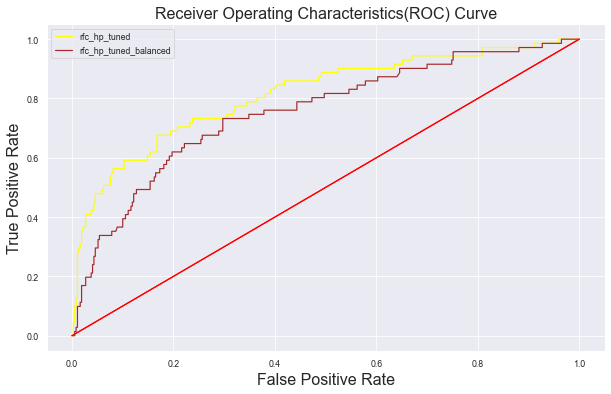

In [35]:
#collapse
rfc= RandomForestClassifier(**rsearch_rfc.best_params_,random_state=3)
y_test_pred, y_test_prob = model_eval(rfc , 'rfc_hp_tuned', X_train , y_train , X_test , y_test)
y_test_pred, y_test_prob =  aug_pipeline(rfc , 'rfc_hp_tuned_balanced', X_train, y_train, X_test, y_test)

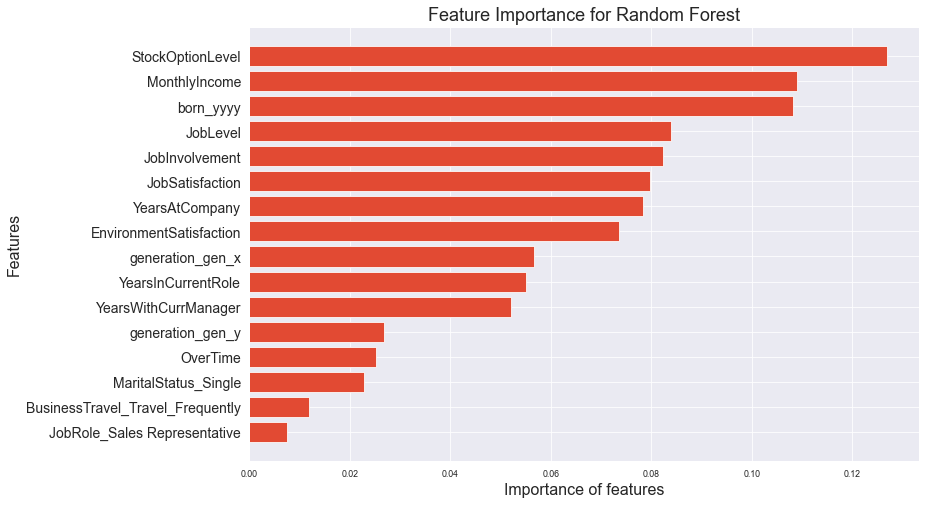

In [36]:
#collapse
importances = rfc.feature_importances_
names = X_train.columns
importances, names = zip(*sorted(zip(importances, names)))

# Lets plot this
plt.figure(figsize=(12,8))
plt.barh(range(len(names)), importances, align = 'center')
plt.yticks(range(len(names)), names, fontsize = 14)
plt.xlabel('Importance of features', fontsize = 16)
plt.ylabel('Features', fontsize = 16)
plt.title('Feature Importance for Random Forest', fontsize = 18)
plt.show()

# PCR = PCA + Regression/Classification

**Principle Component Regression (PCR)** is an algorithm for reducing the multi-collinearity of a dataset. The problem we face in multi-variate linear regression (linear regression with a large number of features) is that although it may appear that we do fit the model well, there is normally a high-variance problem on the test set. The **key idea** of how PCR aims to do this, is to use PCA on the dataset before regression/classification. In PCR instead of regressing the dependent variable on the independent variables directly, the principal components of the independent variables are used.


**Bias-Variance Tradeoff**
In order to prevent this degree of overfitting, PCR aims to add a slight bias, such that we are now aiming to fit the model with a slightly less training accuracy, but aim to reduce the variance to a large extent. PCR aims to achieve something very similar to what Ridge Regression tries to do. Both of these methods try to reduce overfitting, but differ in their approach


**NOTE**: PCR is NOT a feature selection method, as a feature selection method would involve selecting a few features as it is, out of all of them. Instead, we are combining features to create new PCs, which are different from the original features.
PCR is particularly useful on datasets facing the problem of multi-collinearity
On datasets with highly correlated features, or even collinear features, PCR is quite useful
PCR reduces the problem of overfitting

**Implementation:**

To determine the lower M-dimensional space, firstly the high-dimension dataset with all features and data points is normalized to have a mean 0 and standard deviation 1 and transformed to obtain PCs.
Normalized PCs ensure that no predictor variable is overly influential in the model if it happens to be measured in different units. Resultant PCs are fitted
and the transformed dataset(X_reduced) is fed to a 10-fold Cross Validation logistic regression model over a loop which adds dimensions one-by-one and reports the accuracy of this PCR formulation. The
accuracy and ‘explained_variance_ratio_’ for all dimensions helps us in selecting the optimum number of components on which we train our splitted training dataset and predict test accuracy of
89%. We extend the PCA model by regressing a logistic regression aimed at binary classification to predict potential attrition in the organisation. PCA and logistic regression is applied on all the PCs.

In [37]:
# collapse
# Defining y and X for basic PCA() Estimation
y = d_dummies.Attrition
# Drop the column with the independent variable Attrtion, non-impacting variable EmployeeNumber and columns for which we have created dummy variables
X = d_dummies.drop(['Attrition'], axis=1)
display(
    X.shape,
    X.head(2)
)

(1470, 48)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,born_yyyy,BusinessTravel_Travel_Rarely,BusinessTravel_Travel_Frequently,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Medical,EducationField_Marketing,EducationField_Technical Degree,EducationField_Other,Gender_Male,JobRole_Sales Executive,JobRole_Research Scientist,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Healthcare Representative,JobRole_Manager,JobRole_Sales Representative,JobRole_Research Director,MaritalStatus_Married,MaritalStatus_Single,generation_gen_y,generation_gen_x,generation_gen_baby_boomer
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3.713572,7.004882,0.000000,2,2,4.543295,3,2,4,8.698347,9.877092,8,1,2.397895,3,1,0,8,0,1,6,4,0,5,7.587817,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
2,3.891820,5.631212,2.079442,1,3,4.110874,2,2,2,8.542861,10.122904,1,0,3.135494,4,4,1,10,3,3,10,7,1,7,7.583756,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0


### Transform Fit PCA + Logistic Regression on entire dataset

**Defining PCA object ~ What's scale for?**
- pca.fit_transform(scale(X)): This tells Python that each of the predictor variables should be scaled to have a mean of 0 and a standard deviation of 1. This ensures that no predictor variable is overly influential in the model if it happens to be measured in different units

In [38]:
# collapse
# Check the number of PC's to use during training by classifying the PC's on entire dataset
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

# 10-fold CV, with shuffle
n = len(X_reduced)
kf_10 = KFold( n_splits=10, shuffle=True, random_state=1)

logR = LogisticRegression(random_state=0)
cv_acc_results = []

# Calculate Accuracy with only the intercept (no principal components in Log regression)
score = cross_val_score(logR, np.ones((n,1)), y, cv = kf_10, scoring='accuracy')
cv_acc_results.append(round(score.mean()*100, 2))
print(cv_acc_results)

# Calculate Accuracy using CV for the all principle components, adding one component at the time.
for i in np.arange(1, len(X.columns)):
    score = cross_val_score(logR, X_reduced[:,:i], y, cv=kf_10, scoring='accuracy').mean()
    cv_acc_results.append(round(score.mean()*100, 2))
print(cv_acc_results[30:38])
    # check when results start to exceed 88% what is the number of PCs or n_components
    # We will use this n_components in training and test models

[83.88]
[88.37, 87.82, 88.03, 87.89, 88.03, 87.82, 88.03, 88.03]


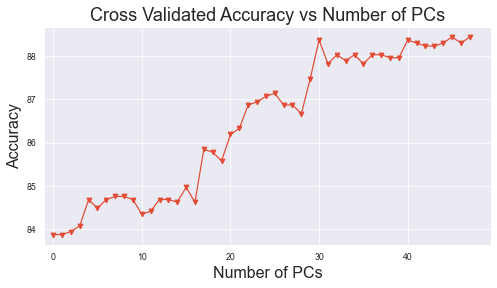

In [39]:
# collapse
# Plot results 
plt.figure(figsize=(8,4))
plt.plot(cv_acc_results, '-v')
plt.xlabel('Number of PCs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Cross Validated Accuracy vs Number of PCs', fontsize=18)
plt.xlim(xmin=-1);
# pd.DataFrame(pca.components_.T)

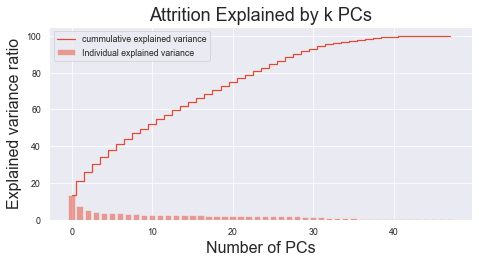

In [40]:
# collapse
var_exp = np.round(pca.explained_variance_ratio_, decimals=4)*100
cum_var_exp = np.cumsum(var_exp)
plt.figure(figsize=(7,4))
plt.bar(range(X.shape[1]),var_exp,alpha=0.5,align='center',label='Individual explained variance')
plt.step(range(X.shape[1]),cum_var_exp,where='mid',label='cummulative explained variance')
plt.ylabel("Explained variance ratio", fontsize=16)
plt.xlabel("Number of PCs", fontsize=16)
plt.title('Attrition Explained by k PCs', fontsize=18)
plt.legend(loc='best')
plt.tight_layout()
plt.show()
# notice explanatory ratio from 90-95% around 32-35 : we can choose any dimension between this

### Split Dataset

In [41]:
# collapse
# Split into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X.shape)
print(y.shape)

(1029, 48)
(441, 48)
(1029,)
(441,)
(1470, 48)
(1470,)


### Transform fit PCR on Training Dataset and Evlauate Performance

**************************************************
Training Metrics
Confusion matrix - Train : 
 [[848  15]
 [102  64]]
Overall Accuracy - Train : 0.8862973760932945
**************************************************
Testing Metrics
Confusion matrix - Test : 
 [[365   5]
 [ 49  22]]
Overall Accuracy - Test : 0.8775510204081632
AUC - Test: 0.795317853064332
**************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       370
           1       0.81      0.31      0.45        71

    accuracy                           0.88       441
   macro avg       0.85      0.65      0.69       441
weighted avg       0.87      0.88      0.85       441

**************************************************
Training Metrics
Confusion matrix - Train : 
 [[844  19]
 [ 94  72]]
Overall Accuracy - Train : 0.8901846452866861
**************************************************
Testing Metrics
Confus

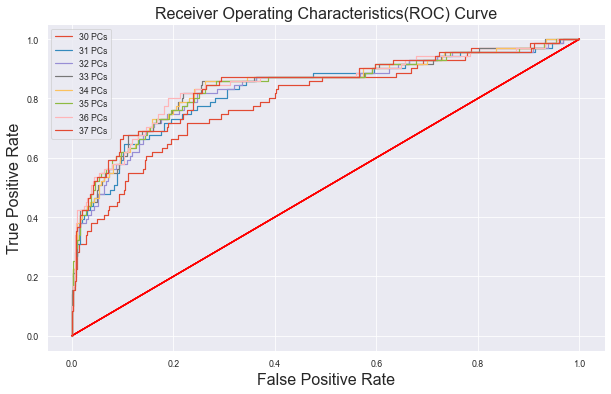

In [42]:
# collapse
for i in range(30, 38):
    n_components = i
    pca2 = PCA(n_components=n_components)
    X_reduced_train = pca2.fit_transform(scale(X_train))
    X_reduced_test = pca2.transform(scale(X_test))
    
    logR = LogisticRegression()
    logR.fit(X_reduced_train, y_train)
    
    # PRediction with training data
    y_train_pred = logR.predict(X_reduced_train)
    y_train_prob = logR.predict_proba(X_reduced_train)
    
    # Prediction with test data
    y_pred = logR.predict(X_reduced_test)
    y_test_prob = logR.predict_proba(X_reduced_test)[:,1]
    y_test_pred = y_pred
    algo = logR
    
    conf_m = confusion_matrix(y_test , y_test_pred)
    
    #overall acc of train model
    print('*'*50)
    print("Training Metrics")
    print('Confusion matrix - Train :', '\n',confusion_matrix(y_train , y_train_pred, labels=[0,1]))
    print('Overall Accuracy - Train :',accuracy_score(y_train , y_train_pred))
    
    print('*'*50)
    print("Testing Metrics")
    print('Confusion matrix - Test :', '\n', conf_m)
    print('Overall Accuracy - Test :',accuracy_score(y_test , y_test_pred))
    print('AUC - Test:', roc_auc_score(y_test , y_test_prob))

    print('*'*50)    
    print('Classification Report:\n', classification_report(y_test, y_test_pred))

    fpr , tpr , threshold = roc_curve(y_test , y_test_prob)
    plt.plot(fpr , fpr, 'r-')
    plt.plot(fpr , tpr , label=f'{i} PCs')
    plt.title("Receiver Operating Characteristics(ROC) Curve")
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.legend(loc='best')

### Performance Evaluation for PCR
One of the Advantages of PCR is that it alleviates multicollinearity in our 48 dimension dataset by reducing it to 33 dimensions because the 33 PCs well approximate 95% essence of the high
dimensional dataset which can be monitored using the ‘explained_variance_ratio_’ parameter. PCR also prevents overfitting on training datasets by introducing a slight bias while training. This
facilitates a bias-variance trade-off by reducing variance on the test dataset to a large extent but decreases the training accuracy which is a fair trade-off to avoid overfitting. Major disadvantage of PCR is that PCR produces models that are difficult to interpret since PCs cannot be interpreted to conclude for the feature importance. Hence, we look forward to exploring more interpretable models
so as to accurately understand the importance of features in attrition.